# examine the PFS Cosmology target density with different dust maps

In [1]:
import numpy as np
from astropy.table import Table, vstack

from pfstarget import cuts as Cuts

In [2]:
import healpy as hp

In [3]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# calculate effective healpixel area
This takes a long time due to I/O... 

In [4]:
npix = hp.nside2npix(128)  # Total number of pixels
hp_area = hp.nside2pixarea(128, degrees=True) # sq. deg in each pixel

In [5]:
for i in range(3): 
    randoms = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/%i.ran.fits' % i)

    # calculate number of randoms in each healpix
    hpix_full = hp.ang2pix(128, np.radians(90.0 - randoms['dec']), np.radians(randoms['ra']))
    uhpix, nhpix = np.unique(hpix_full, return_counts=True)
    if i == 0:
        hp_map_full = np.zeros(npix)
    hp_map_full[uhpix] += nhpix

    
    # inputvalue count and bright star mask
    _mask = Cuts.random_masking(randoms)    
    
    # calculate number of randoms **outside** of mask in each healpix
    hpix = hp.ang2pix(128, np.radians(90.0 - randoms['dec'][~_mask]), np.radians(randoms['ra'][~_mask]))
    uhpix, nhpix = np.unique(hpix, return_counts=True)
    if i == 0: hp_map_masked = np.zeros(npix)
    hp_map_masked[uhpix] += nhpix

In [ ]:
hp_map_effarea = hp_area * (hp_map_masked / hp_map_full)

/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_19454/1208511705.py:1: RuntimeWarning: invalid value encountered in divide
  hp_map_effarea = hp_area * (hp_map_masked / hp_map_full)


In [10]:
np.save('hp_map_effarea.nside128.0_2.npy', hp_map_effarea)

# calculate target density

In [16]:
for i in range(3): 
    tract = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/%i.fits' % i)
    # prepare tract 
    hsc = Cuts._prepare_hsc(tract,  dust_extinction='sfd98')
    
    # apply PFS Cosmology target selection 
    is_pfscosmo = Cuts.isCosmology(hsc)
    targets = hsc[is_pfscosmo] 

    hpix = hp.ang2pix(128, np.radians(90.0 - targets['DEC']), np.radians(targets['RA']))
    uhpix, nhpix = np.unique(hpix, return_counts=True)

    if i == 0: hp_targets_sfd98 = np.zeros(npix)
    hp_targets_sfd98[uhpix] += nhpix

/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_19454/1598247711.py:1: RuntimeWarning: invalid value encountered in divide
  hp.cartview(hp_targets_sfd98 / hp_map_effarea, title="PFS Targets (SFD98 dust map)", cmap="viridis", coord=['C'], min=3e3, max=9e3)


(-10.0, 2.0)

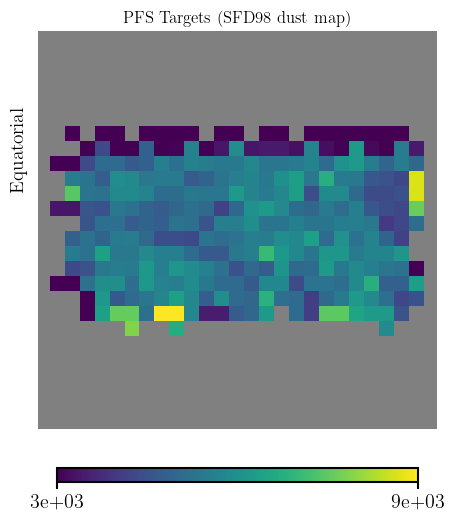

In [17]:
hp.cartview(hp_targets_sfd98 / hp_map_effarea, title="PFS Targets (SFD98 dust map)", cmap="viridis", coord=['C'], min=3e3, max=9e3)
plt.xlim(-28, -40)
plt.ylim(-10, 2)

In [18]:
for i in range(3): 
    tract = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/%i.fits' % i)
    # prepare tract 
    hsc = Cuts._prepare_hsc(tract,  dust_extinction='desi', zeropoint=False)
    
    # apply PFS Cosmology target selection 
    is_pfscosmo = Cuts.isCosmology(hsc)
    targets = hsc[is_pfscosmo] 

    hpix = hp.ang2pix(128, np.radians(90.0 - targets['DEC']), np.radians(targets['RA']))
    uhpix, nhpix = np.unique(hpix, return_counts=True)

    if i == 0: hp_targets_desi = np.zeros(npix)
    hp_targets_desi[uhpix] += nhpix

/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:88: RuntimeWarning: invalid value encountered in subtract
  cuts &= ((objects['G_MAG'] - objects['R_MAG'] > -1) &
/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:53: RuntimeWarning: invalid value encountered in subtract
  cuts &= (((objects['G_MAG'] - objects['R_MAG']) < g_r_cut) | # g-r cut (for 1.6 < z < 2.4 ELGs)
/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:55: RuntimeWarning: invalid value encountered in subtract
  > color_slope * (objects['G_MAG'] - objects['R_MAG'])- color_yint))


/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_19454/1901199365.py:1: RuntimeWarning: invalid value encountered in divide
  hp.cartview(hp_targets_desi / hp_map_effarea, title="PFS Targets (DESI dust map)",


(-10.0, 2.0)

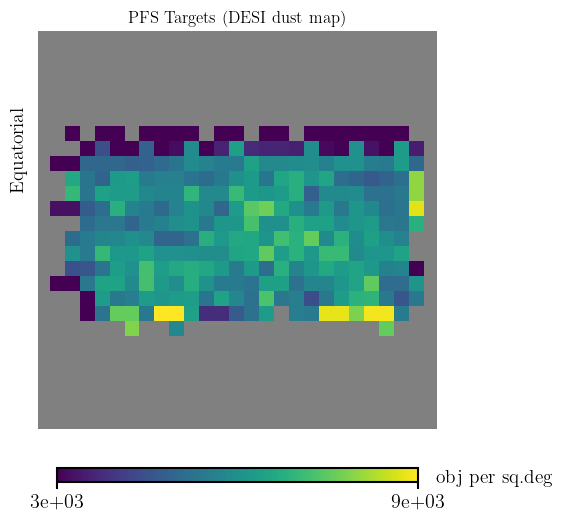

In [25]:
hp.cartview(hp_targets_desi / hp_map_effarea, title="PFS Targets (DESI dust map)", 
            cmap="viridis", coord=['C'], min=3e3, max=9e3, unit="obj per sq.deg")
plt.xlim(-28, -40)
plt.ylim(-10, 2)

/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_19454/1783266230.py:1: RuntimeWarning: invalid value encountered in divide
  hp.cartview((hp_targets_sfd98 - hp_targets_desi) / hp_map_effarea, title="(PFS Targets SFD98) - (PFS Target DESI dust)",


(-10.0, 2.0)

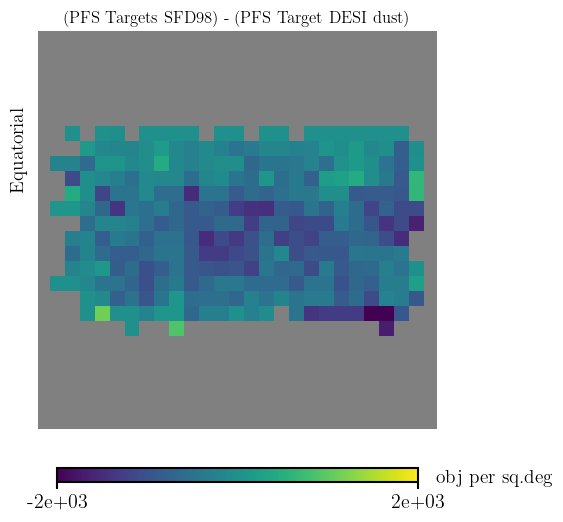

In [27]:
hp.cartview((hp_targets_sfd98 - hp_targets_desi) / hp_map_effarea, title="(PFS Targets SFD98) - (PFS Target DESI dust)", 
            cmap="viridis", coord=['C'], min=-2e3, max=2e3, unit="obj per sq.deg")
plt.xlim(-28, -40)
plt.ylim(-10, 2)

/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_19454/928532270.py:1: RuntimeWarning: invalid value encountered in divide
  hp.cartview(100*((hp_targets_sfd98 / hp_targets_desi) - 1), title="(PFS Targets SFD98)/(PFS Target DESI dust)-1",


(-10.0, 2.0)

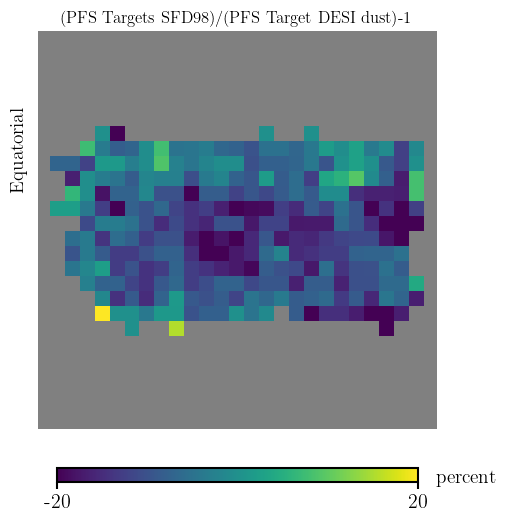

In [29]:
hp.cartview(100*((hp_targets_sfd98 / hp_targets_desi) - 1), title="(PFS Targets SFD98)/(PFS Target DESI dust)-1", 
            cmap="viridis", coord=['C'], min=-20, max=20, unit="percent")
plt.xlim(-28, -40)
plt.ylim(-10, 2)